## Logistic Regression (Phishing Dataset)

In [1]:
#CellStrat - Load the phishing website dataset (this dataset has 11000+ data samples). Each sample has 30 website
#parameters and then a class label identifying it as a phishing website or not (1 or -1).

#The task is to train a Logistic Regression classifier which can detect phishing websites.

#Use 70% data for training and 30% for testing.

#Train the model using training data and then use it to predict the test data.

#Then print the count of misclassified samples in the test data prediction as well as the accuracy score of this prediction.

#Then train with only two input parameters. e.g. parameter index 5 (parameter Prefix_Suffix) and 13 (URL_of_Anchor) only out of
#30 parameters. Check accuracy on the test data again and compare the accuracy with the previous value, where it was
#trained on all the parameters.

#Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

### Import modules

In [2]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

### Define Input and Output

In [3]:
phishing = np.loadtxt('phishing.txt', delimiter=',')

#attribute having_IP_Address  { -1,1 }
#attribute URL_Length   { 1,0,-1 }
#attribute Shortining_Service { 1,-1 }
#attribute having_At_Symbol   { 1,-1 }
#attribute double_slash_redirecting { -1,1 }
#attribute Prefix_Suffix  { -1,1 }
#attribute having_Sub_Domain  { -1,0,1 }
#attribute SSLfinal_State  { -1,1,0 }
#attribute Domain_registeration_length { -1,1 }
#attribute Favicon { 1,-1 }
#attribute port { 1,-1 }
#attribute HTTPS_token { -1,1 }
#attribute Request_URL  { 1,-1 }
#attribute URL_of_Anchor { -1,0,1 }
#attribute Links_in_tags { 1,-1,0 }
#attribute SFH  { -1,1,0 }
#attribute Submitting_to_email { -1,1 }
#attribute Abnormal_URL { -1,1 }
#attribute Redirect  { 0,1 }
#attribute on_mouseover  { 1,-1 }
#attribute RightClick  { 1,-1 }
#attribute popUpWidnow  { 1,-1 }
#attribute Iframe { 1,-1 }
#attribute age_of_domain  { -1,1 }
#attribute DNSRecord   { -1,1 }
#attribute web_traffic  { -1,0,1 }
#attribute Page_Rank { -1,1 }
#attribute Google_Index { 1,-1 }
#attribute Links_pointing_to_page { 1,0,-1 }
#attribute Statistical_report { -1,1 }
#attribute Result  { -1,1 }

In [31]:
#create solution here
X=np.array(phishing[:,:-1])
y=np.array(phishing[:,-1])
print(X)
print(y)


[[-1.  1.  1. ...  1.  1. -1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  0.  1. ...  1.  0. -1.]
 ...
 [ 1. -1.  1. ...  1.  0.  1.]
 [-1. -1.  1. ...  1.  1.  1.]
 [-1. -1.  1. ... -1.  1. -1.]]
[-1. -1. -1. ... -1. -1. -1.]


In [5]:

# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())

# Standardizing the features:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression (random_state = 0)
LRClassifier.fit (X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
prediction = LRClassifier.predict (X_test)

prediction

array([ 1., -1., -1., ..., -1., -1.,  1.])

In [8]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)

print(confusionMatrix)

[[1321  149]
 [  99 1748]]


In [9]:
print('Misclassified samples: %d' % (y_test != prediction).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, prediction))

Misclassified samples: 248
Accuracy: 0.93


In [10]:
#Decision boundary when trained with index 5 and index 13 
X=np.array(phishing[:,[5,13]])
y=np.array(phishing[:,-1])
X

array([[-1., -1.],
       [-1.,  0.],
       [-1.,  0.],
       ...,
       [-1.,  0.],
       [-1., -1.],
       [-1., -1.]])

In [11]:
# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())

# Standardizing the features:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression (random_state = 0)
LRClassifier.fit (X_train, y_train)

LogisticRegression(random_state=0)

In [13]:
prediction = LRClassifier.predict (X_test)

prediction

array([ 1., -1.,  1., ...,  1.,  1.,  1.])

In [14]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)

print(confusionMatrix)

[[ 933  537]
 [   6 1841]]


In [15]:
print('Misclassified samples: %d' % (y_test != prediction).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, prediction))

Misclassified samples: 543
Accuracy: 0.84


In [27]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x')
    colors = ('green', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:   # # highlight test samples.
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,linewidth=1,
                    marker='o', s=100, label='test set')

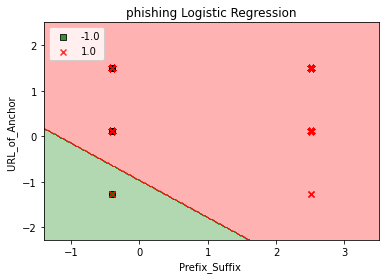

In [29]:
plot_decision_regions(X_test_std, y_test, classifier=LRClassifier)

plt.xlabel('Prefix_Suffix ')
plt.ylabel('URL_of_Anchor ')
plt.legend(loc='upper left')
plt.title('phishing Logistic Regression')
plt.show()